In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


In [2]:
db=pd.read_csv('CAvideos_cc50_202101.csv')

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40881 non-null  object 
 1   trending_date           40881 non-null  object 
 2   title                   40881 non-null  object 
 3   channel_title           40881 non-null  object 
 4   category_id             40881 non-null  int64  
 5   publish_time            40881 non-null  object 
 6   tags                    40881 non-null  object 
 7   views                   40881 non-null  int64  
 8   likes                   40881 non-null  int64  
 9   dislikes                40881 non-null  int64  
 10  comment_count           40881 non-null  int64  
 11  thumbnail_link          40881 non-null  object 
 12  comments_disabled       40881 non-null  bool   
 13  ratings_disabled        40881 non-null  bool   
 14  video_error_or_removed  40881 non-null

In [4]:
db.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)


*Buscamos graficamente si hay valores faltantes*

<Axes: >

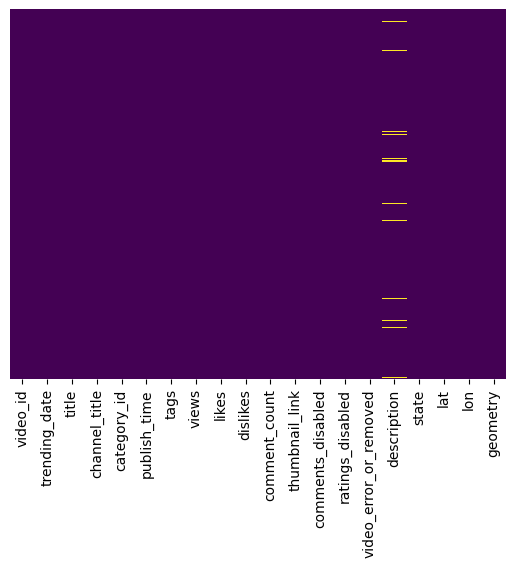

In [5]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Vamos a ver cuántos son

In [6]:
db.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

1296 datos equivalen aproximandamente al 3% de los datos totales, por lo cual podemos obviar dichos datos, puesto que no harían mucha diferencia respecto al total.

In [7]:
db=db.dropna()

<Axes: >

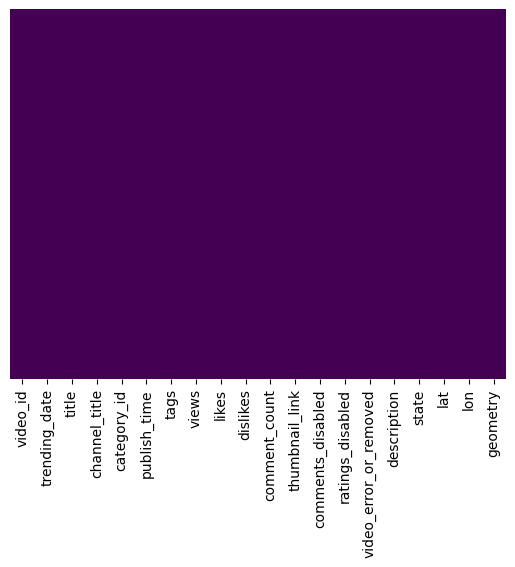

In [8]:
sns.heatmap(db.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*Búsqueda de outliers*

In [9]:
db.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,39585.000000,3.958500e+04,3.958500e+04,3.958500e+04,3.958500e+04,39585.000000,39585.000000
mean,20.778123,1.169234e+06,4.059694e+04,2.058693e+03,5.159716e+03,52.023377,-88.814717
std,6.808714,3.437842e+06,1.345967e+05,1.931258e+04,2.189959e+04,7.207378,25.119362
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,44.566645,-139.000002
25%,20.000000,1.497150e+05,2.395000e+03,1.040000e+02,4.420000e+02,46.249282,-110.733329
50%,24.000000,3.831200e+05,9.244000e+03,3.140000e+02,1.357000e+03,49.822578,-81.236083
75%,24.000000,9.831390e+05,2.967000e+04,9.760000e+02,3.821000e+03,53.016698,-64.347995
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,68.767467,-57.426919


In [11]:
def transform_outliers_to_median(data):
    median_value = np.median(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    
    transformed_data = np.where((data < lower_bound) | (data > upper_bound), median_value, data)
    return transformed_data

In [12]:
db_sin_outliers=db

db_sin_outliers['views']=transform_outliers_to_median(db['views'])
db_sin_outliers['likes']=transform_outliers_to_median(db['likes'])
db_sin_outliers['dislikes']=transform_outliers_to_median(db['dislikes'])
db_sin_outliers['comment_count']=transform_outliers_to_median(db['comment_count'])

views

<Axes: ylabel='views'>

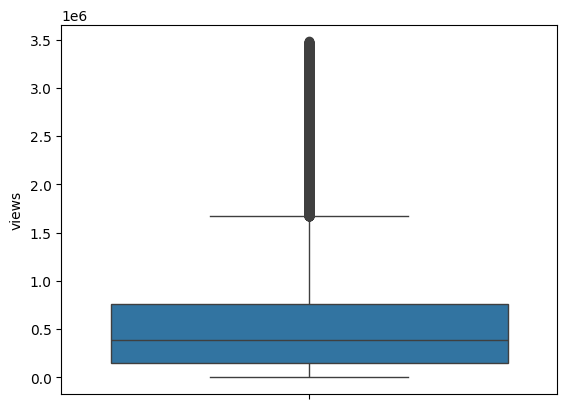

In [13]:
sns.boxplot(db_sin_outliers['views'])

<Axes: ylabel='views'>

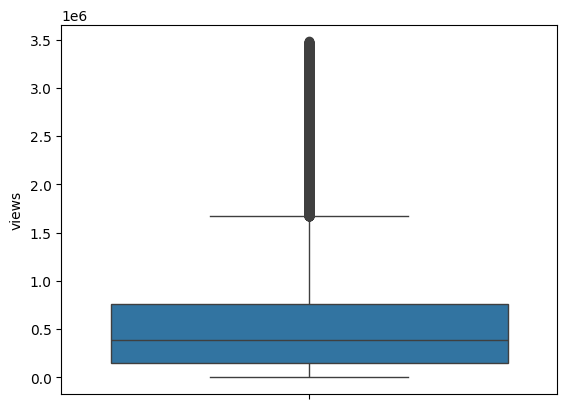

In [14]:
sns.boxplot(y=db['views'])

likes

<Axes: ylabel='likes'>

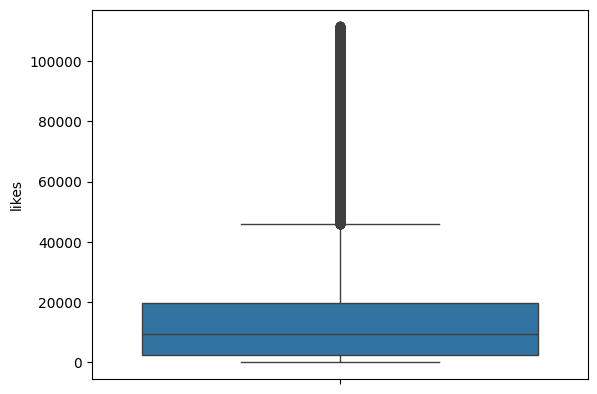

In [15]:
sns.boxplot(db_sin_outliers['likes'])

<Axes: ylabel='likes'>

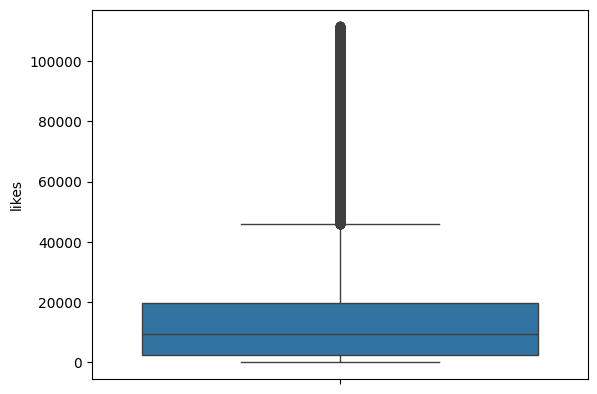

In [16]:
sns.boxplot(y=db['likes'])

dislikes

<Axes: ylabel='dislikes'>

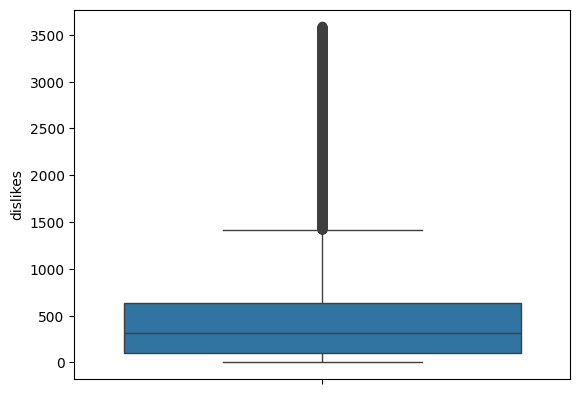

In [17]:
sns.boxplot(db_sin_outliers['dislikes']) 

<Axes: ylabel='dislikes'>

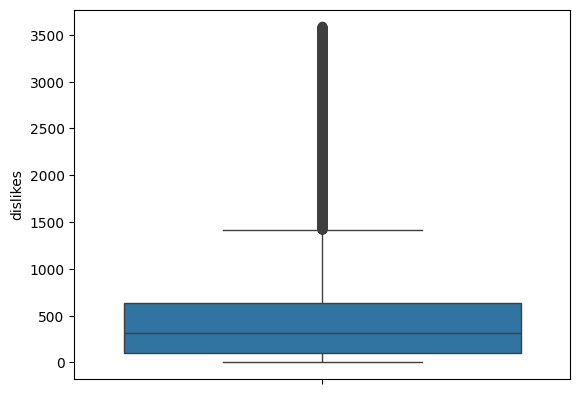

In [18]:
sns.boxplot(y=db['dislikes'])

comment count

<Axes: ylabel='comment_count'>

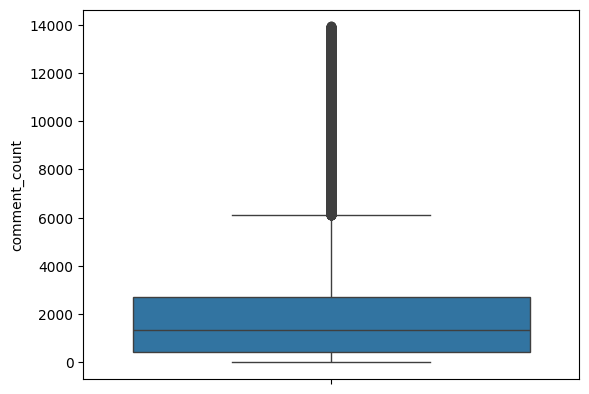

In [19]:
sns.boxplot(db_sin_outliers['comment_count']) 

<Axes: ylabel='comment_count'>

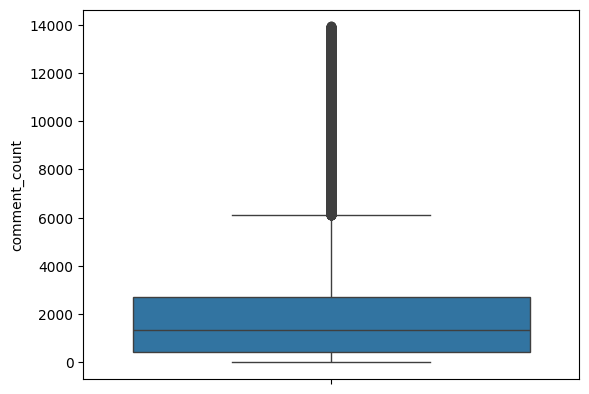

In [20]:
sns.boxplot(y=db['comment_count'])

eliminando columnas innecesarias

In [21]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39585 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                39585 non-null  object 
 1   trending_date           39585 non-null  object 
 2   title                   39585 non-null  object 
 3   channel_title           39585 non-null  object 
 4   category_id             39585 non-null  int64  
 5   publish_time            39585 non-null  object 
 6   tags                    39585 non-null  object 
 7   views                   39585 non-null  float64
 8   likes                   39585 non-null  float64
 9   dislikes                39585 non-null  float64
 10  comment_count           39585 non-null  float64
 11  thumbnail_link          39585 non-null  object 
 12  comments_disabled       39585 non-null  bool   
 13  ratings_disabled        39585 non-null  bool   
 14  video_error_or_removed  39585 non-null  boo

In [22]:
db_sin_outliers.drop('thumbnail_link',axis=1,inplace=True)
db_sin_outliers.drop('description',axis=1,inplace=True)

In [23]:
scaler = MinMaxScaler()
db_sin_outliers['new_views'] = scaler.fit_transform(db_sin_outliers[['views']])
db_sin_outliers['new_likes'] = scaler.fit_transform(db_sin_outliers[['likes']])
db_sin_outliers['new_dislikes'] = scaler.fit_transform(db_sin_outliers[['dislikes']])
db_sin_outliers['new_comment_count'] = scaler.fit_transform(db_sin_outliers[['comment_count']])

In [24]:
db_sin_outliers.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon,new_views,new_likes,new_dislikes,new_comment_count
count,39585.000000,3.958500e+04,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000,39585.000000
mean,20.778123,5.967367e+05,16157.893874,528.792699,2187.057749,52.023377,-88.814717,0.171146,0.144929,0.147255,0.156970
std,6.808714,6.756401e+05,21348.665614,678.688313,2678.181124,7.207378,25.119362,0.194014,0.191488,0.188997,0.192219
min,1.000000,7.330000e+02,0.000000,0.000000,0.000000,44.566645,-139.000002,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.497150e+05,2395.000000,104.000000,442.000000,46.249282,-110.733329,0.042781,0.021482,0.028961,0.031723
50%,24.000000,3.831200e+05,9244.000000,314.000000,1357.000000,49.822578,-81.236083,0.109805,0.082915,0.087441,0.097395
75%,24.000000,7.579970e+05,19809.000000,630.000000,2714.000000,53.016698,-64.347995,0.217453,0.177678,0.175439,0.194789
max,43.000000,3.483165e+06,111488.000000,3591.000000,13933.000000,68.767467,-57.426919,1.000000,1.000000,1.000000,1.000000


In [25]:
db_sin_outliers.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,state,lat,lon,geometry,new_views,new_likes,new_dislikes,new_comment_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",383120.0,9244.0,314.0,...,False,False,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545),0.109805,0.082915,0.087441,0.097395
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,9244.0,1688.0,...,False,False,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035),0.291152,0.082915,0.470064,0.935190
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,9244.0,314.0,...,False,False,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185),0.916228,0.082915,0.087441,0.587167
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,9244.0,1989.0,...,False,False,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097),0.601618,0.082915,0.553885,0.097395
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",383120.0,9244.0,314.0,...,False,False,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802),0.109805,0.082915,0.087441,0.097395


Pregunta 1: ¿Qué categorías de videos son las de mayor tendencia?

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\1212266499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='new_views', data=category_views, palette='viridis')


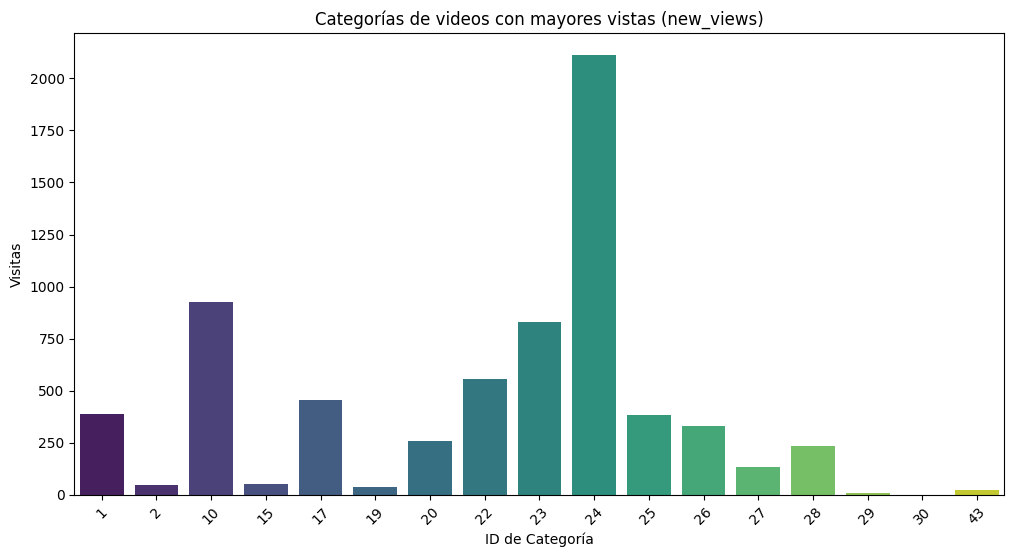

Categorías de videos con mayores vistas (new_views):
    category_id    new_views
9            24  2113.461719
2            10   923.688337
8            23   830.194167
7            22   556.382184
4            17   456.516972
0             1   386.505524
10           25   381.616822
11           26   332.701659
6            20   259.465133
13           28   234.672010


In [46]:
data = db_sin_outliers[['category_id', 'new_views']]

# Agrupar por categoría y calcular la suma de new_views
category_views = data.groupby('category_id')['new_views'].sum().reset_index()
category_views = category_views.sort_values(by='new_views', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='new_views', data=category_views, palette='viridis')
plt.title('Categorías de videos con mayores vistas (new_views)')
plt.xlabel('ID de Categoría')
plt.ylabel('Visitas')
plt.xticks(rotation=45)
plt.show()

print("Categorías de videos con mayores vistas (new_views):")
print(category_views.head(10))

In [54]:
#Modelo de regresion Lineal

from sklearn.linear_model import LinearRegression


X = data[['category_id']]
y = data['new_views']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_scaled, y)



# Hacer predicciones (esto es solo un ejemplo, en realidad estaríamos prediciendo nuevos datos)
y_pred = model.predict(X_scaled)

# Agregar las predicciones al DataFrame
data['predicted_views'] = y_pred

# Mostrar resultados
result = data.groupby('category_id')['predicted_views'].sum().reset_index()
result = result.sort_values(by='predicted_views', ascending=False)


# Paso 6: Resultados
print("Categorías con mayores tendencias basadas en new_views:")
print(result.head())

Categorías con mayores tendencias basadas en new_views:
    category_id  predicted_views
9            24      2138.963235
2            10       740.801259
7            22       625.295342
10           25       617.535734
8            23       614.986825


C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\762213098.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_views'] = y_pred


Pregunta 2:¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\4282932496.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='new_likes', data=category_likes, palette='viridis')


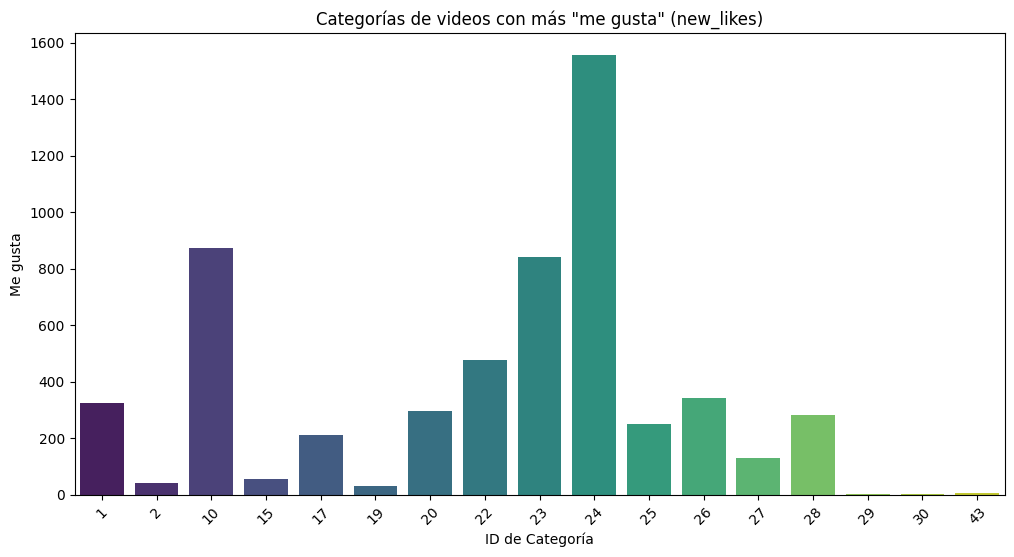

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\4282932496.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='new_dislikes', data=category_dislikes, palette='viridis')


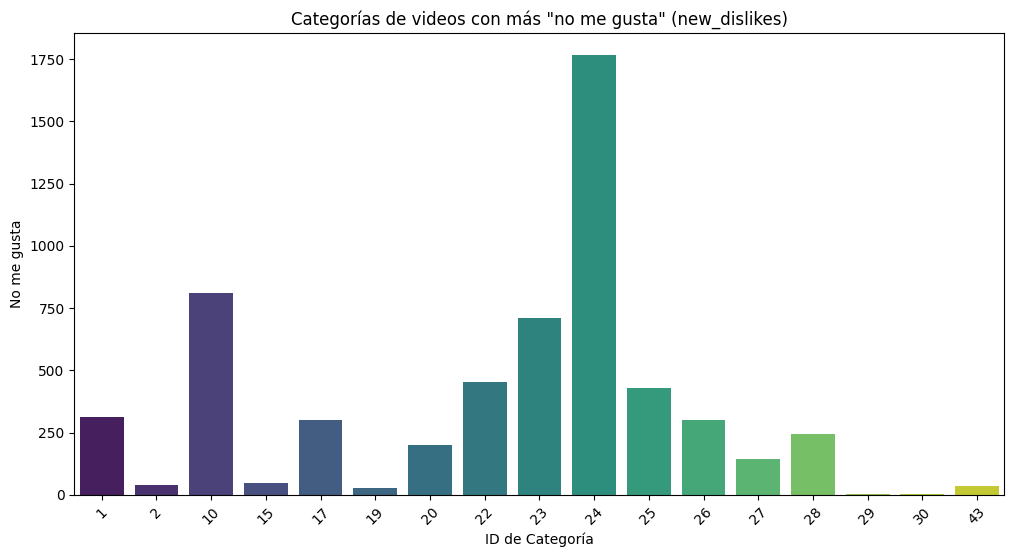

Categorías de videos con más 'me gusta' (new_likes):
    category_id    new_likes
9            24  1558.030012
2            10   873.774909
8            23   841.292659
7            22   478.592862
11           26   344.428656
0             1   326.664430
6            20   298.205260
13           28   281.166978
10           25   251.783815
4            17   213.049978

Categorías de videos con menos 'me gusta' (new_likes):
    category_id   new_likes
13           28  281.166978
10           25  251.783815
4            17  213.049978
12           27  129.641513
3            15   57.051001
1             2   42.313424
5            19   31.254386
16           43    5.285439
15           30    2.268450
14           29    2.228276

Categorías de videos con más 'no me gusta' (new_dislikes):
    category_id  new_dislikes
9            24   1768.089669
2            10    809.380395
8            23    710.206349
7            22    453.543581
10           25    427.574492
0             1    313.9

In [57]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Paso 2: Seleccionar columnas relevantes
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Agrupar por categoría y calcular la suma de new_likes y new_dislikes
category_likes = data.groupby('category_id')['new_likes'].sum().reset_index()
category_dislikes = data.groupby('category_id')['new_dislikes'].sum().reset_index()

# Ordenar los resultados
category_likes = category_likes.sort_values(by='new_likes', ascending=False)
category_dislikes = category_dislikes.sort_values(by='new_dislikes', ascending=False)

# Paso 4: Visualización de las categorías con más y menos "me gusta"
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='new_likes', data=category_likes, palette='viridis')
plt.title('Categorías de videos con más "me gusta" (new_likes)')
plt.xlabel('ID de Categoría')
plt.ylabel('Me gusta')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='new_dislikes', data=category_dislikes, palette='viridis')
plt.title('Categorías de videos con más "no me gusta" (new_dislikes)')
plt.xlabel('ID de Categoría')
plt.ylabel('No me gusta')
plt.xticks(rotation=45)
plt.show()

# Paso 5: Mostrar los resultados escritos de las categorías con más y menos "me gusta" y "no me gusta"
print("Categorías de videos con más 'me gusta' (new_likes):")
print(category_likes.head(10))

print("\nCategorías de videos con menos 'me gusta' (new_likes):")
print(category_likes.tail(10))

print("\nCategorías de videos con más 'no me gusta' (new_dislikes):")
print(category_dislikes.head(10))

print("\nCategorías de videos con menos 'no me gusta' (new_dislikes):")
print(category_dislikes.tail(10))

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\1010339164.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_likes'] = y_likes_pred
C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\1010339164.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_dislikes'] = y_dislikes_pred
C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\1010339164.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

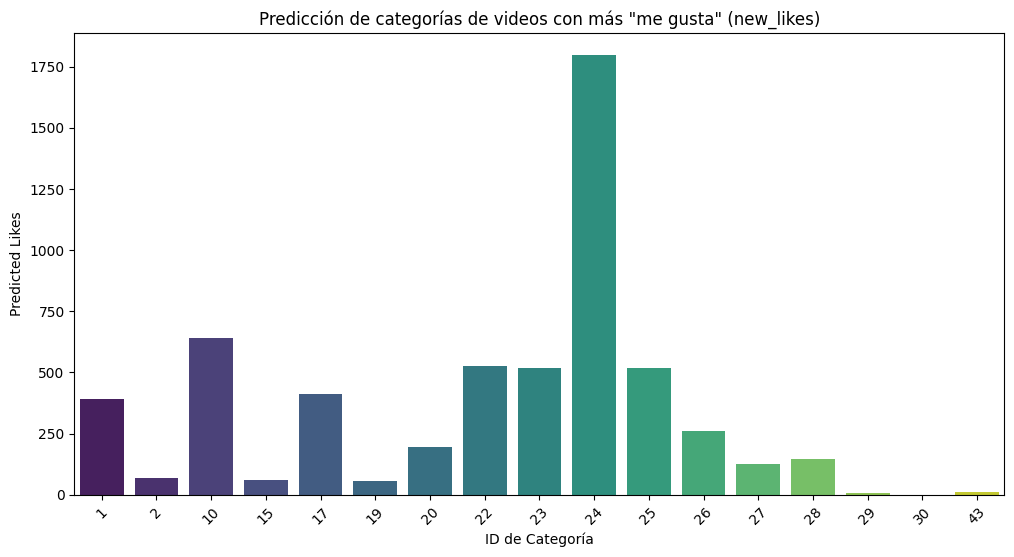

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\1010339164.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='predicted_dislikes', data=predicted_dislikes, palette='viridis')


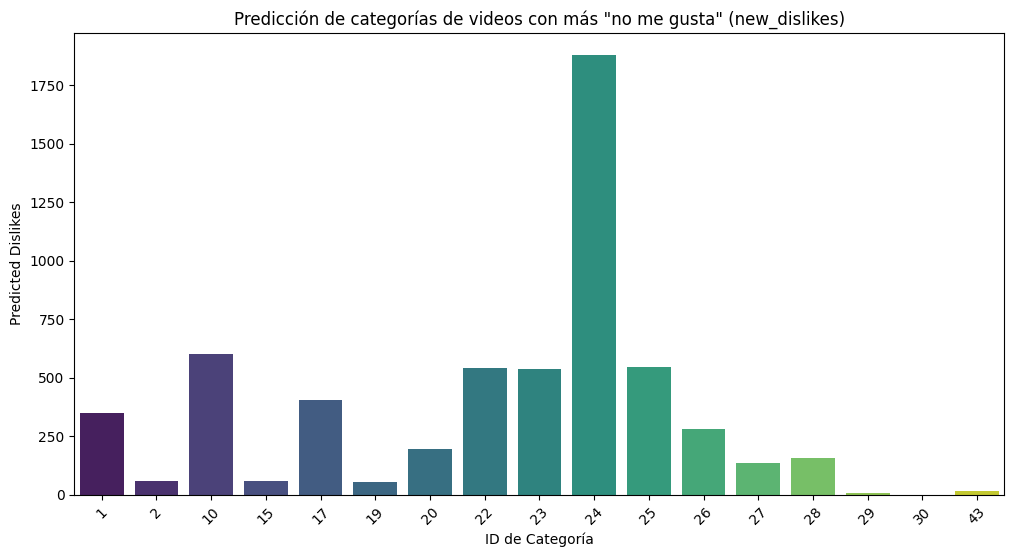

Predicción de categorías de videos con más 'me gusta' (new_likes):
    category_id  predicted_likes
9            24      1798.926402
2            10       638.947615
7            22       528.182870
8            23       518.366600
10           25       518.174488
4            17       410.066111
0             1       392.790073
11           26       262.471793
6            20       195.443997
13           28       144.215618

Predicción de categorías de videos con menos 'me gusta' (new_likes):
    category_id  predicted_likes
11           26       262.471793
6            20       195.443997
13           28       144.215618
12           27       126.452217
1             2        67.407497
3            15        59.016494
5            19        56.379430
16           43        10.814675
14           29         8.650300
15           30         0.725871

Predicción de categorías de videos con más 'no me gusta' (new_dislikes):
    category_id  predicted_dislikes
9            24         187

In [58]:
# Paso 2: Seleccionar columnas relevantes
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Agrupar por categoría y calcular la suma de new_likes y new_dislikes
category_likes = data.groupby('category_id')['new_likes'].sum().reset_index()
category_dislikes = data.groupby('category_id')['new_dislikes'].sum().reset_index()

# Ordenar los resultados
category_likes = category_likes.sort_values(by='new_likes', ascending=False)
category_dislikes = category_dislikes.sort_values(by='new_dislikes', ascending=False)

# Paso 4: Preparar los datos para el modelo
X = data[['category_id']]
y_likes = data['new_likes']
y_dislikes = data['new_dislikes']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo para 'new_likes'
model_likes = LinearRegression()
model_likes.fit(X_scaled, y_likes)

# Hacer predicciones para 'new_likes'
y_likes_pred = model_likes.predict(X_scaled)
data['predicted_likes'] = y_likes_pred

# Crear y entrenar el modelo para 'new_dislikes'
model_dislikes = LinearRegression()
model_dislikes.fit(X_scaled, y_dislikes)

# Hacer predicciones para 'new_dislikes'
y_dislikes_pred = model_dislikes.predict(X_scaled)
data['predicted_dislikes'] = y_dislikes_pred

# Mostrar resultados de predicciones agrupados por categoría
predicted_likes = data.groupby('category_id')['predicted_likes'].sum().reset_index()
predicted_dislikes = data.groupby('category_id')['predicted_dislikes'].sum().reset_index()

predicted_likes = predicted_likes.sort_values(by='predicted_likes', ascending=False)
predicted_dislikes = predicted_dislikes.sort_values(by='predicted_dislikes', ascending=False)

# Paso 5: Visualización de las categorías con más y menos 'me gusta' predichos
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='predicted_likes', data=predicted_likes, palette='viridis')
plt.title('Predicción de categorías de videos con más "me gusta" (new_likes)')
plt.xlabel('ID de Categoría')
plt.ylabel('Predicted Likes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='predicted_dislikes', data=predicted_dislikes, palette='viridis')
plt.title('Predicción de categorías de videos con más "no me gusta" (new_dislikes)')
plt.xlabel('ID de Categoría')
plt.ylabel('Predicted Dislikes')
plt.xticks(rotation=45)
plt.show()

# Paso 6: Mostrar los resultados escritos de las categorías con más y menos "me gusta" y "no me gusta"
print("Predicción de categorías de videos con más 'me gusta' (new_likes):")
print(predicted_likes.head(10))

print("\nPredicción de categorías de videos con menos 'me gusta' (new_likes):")
print(predicted_likes.tail(10))

print("\nPredicción de categorías de videos con más 'no me gusta' (new_dislikes):")
print(predicted_dislikes.head(10))

print("\nPredicción de categorías de videos con menos 'no me gusta' (new_dislikes):")
print(predicted_dislikes.tail(10))

Pregunta 3: ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me
gusta”?

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\169544236.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='like_dislike_ratio', data=category_ratios, palette='viridis')


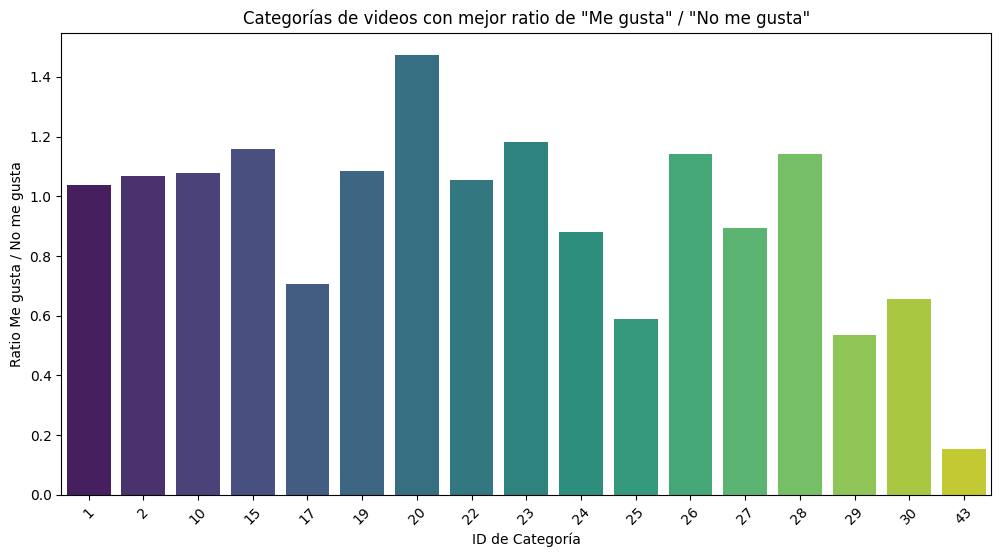

Categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':
    category_id   new_likes  new_dislikes  like_dislike_ratio
6            20  298.205260    201.304651            1.474041
8            23  841.292659    710.206349            1.182909
3            15   57.051001     48.299916            1.157223
13           28  281.166978    244.981064            1.143043
11           26  344.428656    300.727374            1.141523
5            19   31.254386     27.841270            1.083669
2            10  873.774909    809.380395            1.078228
1             2   42.313424     38.616820            1.068067
7            22  478.592862    453.543581            1.052909
0             1  326.664430    313.924534            1.037278


In [59]:
# Paso 2: Seleccionar columnas relevantes
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Agrupar por categoría y calcular la suma de new_likes y new_dislikes
category_likes = data.groupby('category_id')['new_likes'].sum().reset_index()
category_dislikes = data.groupby('category_id')['new_dislikes'].sum().reset_index()

# Paso 4: Combinar los resultados y calcular el ratio
category_ratios = pd.merge(category_likes, category_dislikes, on='category_id')
category_ratios['like_dislike_ratio'] = category_ratios['new_likes'] / (category_ratios['new_dislikes'] + 1)

# Ordenar los resultados
category_ratios = category_ratios.sort_values(by='like_dislike_ratio', ascending=False)

# Paso 5: Visualización de las categorías con mejor ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='like_dislike_ratio', data=category_ratios, palette='viridis')
plt.title('Categorías de videos con mejor ratio de "Me gusta" / "No me gusta"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Me gusta / No me gusta')
plt.xticks(rotation=45)
plt.show()

# Paso 6: Mostrar los resultados escritos de las categorías con mejor ratio
print("Categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':")
print(category_ratios.head(10))

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\3290981087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['like_dislike_ratio'] = data['new_likes'] / (data['new_dislikes'] + 1)
C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\3290981087.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_ratio'] = y_pred


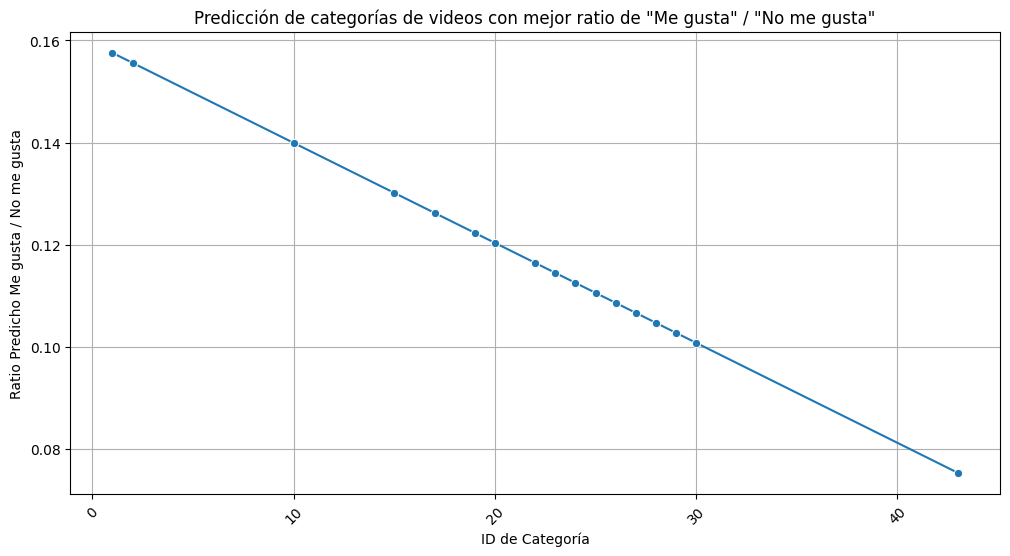

Predicción de categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':
   category_id  predicted_ratio
0            1         0.157565
1            2         0.155606
2           10         0.139933
3           15         0.130138
4           17         0.126220
5           19         0.122302
6           20         0.120343
7           22         0.116425
8           23         0.114466
9           24         0.112506


In [63]:
data = db_sin_outliers[['category_id', 'new_likes', 'new_dislikes']]

# Paso 3: Calcular el ratio
data['like_dislike_ratio'] = data['new_likes'] / (data['new_dislikes'] + 1)

# Paso 4: Preparar los datos para el modelo
X = data[['category_id']]
y = data['like_dislike_ratio']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_scaled, y)

# Hacer predicciones
y_pred = model.predict(X_scaled)
data['predicted_ratio'] = y_pred

# Agrupar las predicciones por categoría
predicted_ratios = data.groupby('category_id')['predicted_ratio'].mean().reset_index()
predicted_ratios = predicted_ratios.sort_values(by='predicted_ratio', ascending=False)

# Paso 5: Visualización de las categorías con mejor ratio predicho
plt.figure(figsize=(12, 6))
sns.lineplot(x='category_id', y='predicted_ratio', data=predicted_ratios, marker='o')
plt.title('Predicción de categorías de videos con mejor ratio de "Me gusta" / "No me gusta"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Predicho Me gusta / No me gusta')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Paso 6: Mostrar los resultados escritos de las categorías con mejor ratio predicho
print("Predicción de categorías de videos con mejor ratio de 'Me gusta' / 'No me gusta':")
print(predicted_ratios.head(10))

Pregunta 4: ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” /
“Comentarios”?

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\3438023408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['views_comments_ratio'] = data['new_views'] / (data['new_comment_count'] + 1)
C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\3438023408.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_id', y='views_comments_ratio', data=category_ratios, palette='viridis')


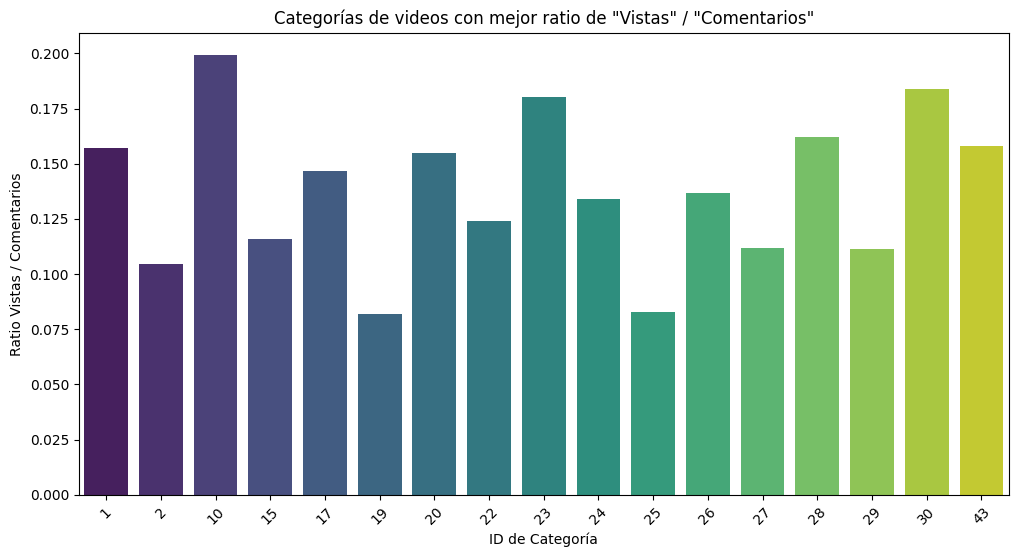

Categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':
    category_id  views_comments_ratio
2            10              0.199357
15           30              0.184024
8            23              0.180071
13           28              0.161896
16           43              0.158021
0             1              0.156963
6            20              0.154640
4            17              0.146506
11           26              0.136657
9            24              0.134136


In [64]:
data = db_sin_outliers[['category_id', 'new_views', 'new_comment_count']]

# Paso 3: Calcular el ratio
data['views_comments_ratio'] = data['new_views'] / (data['new_comment_count'] + 1)

# Agrupar por categoría y calcular la media de views_comments_ratio
category_ratios = data.groupby('category_id')['views_comments_ratio'].mean().reset_index()
category_ratios = category_ratios.sort_values(by='views_comments_ratio', ascending=False)

# Paso 4: Visualización de las categorías con mejor ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='views_comments_ratio', data=category_ratios, palette='viridis')
plt.title('Categorías de videos con mejor ratio de "Vistas" / "Comentarios"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Vistas / Comentarios')
plt.xticks(rotation=45)
plt.show()

# Mostrar los resultados escritos de las categorías con mejor ratio
print("Categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':")
print(category_ratios.head(10))

C:\Users\Diego Salinas\AppData\Local\Temp\ipykernel_20976\1972752779.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_ratio'] = y_pred


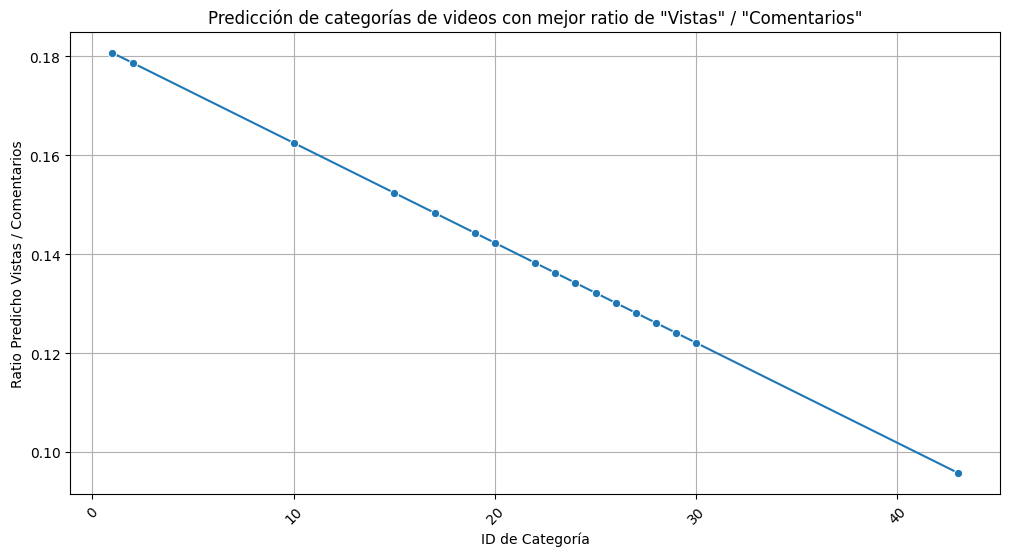

Predicción de categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':
   category_id  predicted_ratio
0            1         0.180713
1            2         0.178691
2           10         0.162513
3           15         0.152402
4           17         0.148357
5           19         0.144313
6           20         0.142290
7           22         0.138246
8           23         0.136223
9           24         0.134201


In [65]:
# Paso 2: Preparar los datos para el modelo
X = data[['category_id']]
y = data['views_comments_ratio']

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_scaled, y)

# Hacer predicciones
y_pred = model.predict(X_scaled)
data['predicted_ratio'] = y_pred

# Agrupar las predicciones por categoría
predicted_ratios = data.groupby('category_id')['predicted_ratio'].mean().reset_index()
predicted_ratios = predicted_ratios.sort_values(by='predicted_ratio', ascending=False)

# Paso 3: Visualización de las categorías con mejor ratio predicho (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(x='category_id', y='predicted_ratio', data=predicted_ratios, marker='o')
plt.title('Predicción de categorías de videos con mejor ratio de "Vistas" / "Comentarios"')
plt.xlabel('ID de Categoría')
plt.ylabel('Ratio Predicho Vistas / Comentarios')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Paso 4: Mostrar los resultados escritos de las categorías con mejor ratio predicho
print("Predicción de categorías de videos con mejor ratio de 'Vistas' / 'Comentarios':")
print(predicted_ratios.head(10))